In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from src.util import calculate_convexity_ratio, non_boundary_convexity
import numpy as np
from scipy.ndimage import label as nd_label
from src.util import color_code_cells
from src.cpm_basic import CellularPottsModel
import os
import os
from concurrent.futures import ProcessPoolExecutor
from src.parallel_simulation import run_parallel
from collections import defaultdict

# TODO: 

Punish the algorithm for small disconnected pixel

In [5]:
n_cells=105
n_types=2 
T=26 
L=150
J = 1000
type_percentages= [1/6, 5/6]  # cell type 1, cell type 2 percentages
adhessions= np.array([[0, 0.2, 0.2],  
                      [0.2, J, J],
                      [0.2, J, J]]) 
volume_coefficient= np.array([0, 1, 1])
perimeter_coefficient= np.array([0, 2, 100])
lattice_type="surrounded_cell"
object_volumes=None # Is default set in the CPM class if none
periodic=False

# for parallel processing
param = {
    "n_cells": n_cells,
    "n_types": n_types,
    "T": T,
    "L": L,
    "type_percentages": type_percentages,
    "adhesions": adhessions,
    "volume_coefficient": volume_coefficient,
    "perimeter_coefficient": perimeter_coefficient,
    "lattice_type": lattice_type,
    "object_volumes": object_volumes,
    "periodic": periodic, 
    "steps": 100_000}

# Surrounded Initialization

In [6]:
cpm = CellularPottsModel(n_cells= n_cells, 
                        n_types=n_types, 
                        T=T, 
                        L=L,
                        type_percentages=type_percentages,  # list of percentages for each type (length n_types)
                        volume_coefficient=volume_coefficient, # 1D array of Cv for each type (length n_types+1)
                        perimeter_coefficient=perimeter_coefficient, # 1D array of Cp for each type (length n_types+1)  
                        adhessions=adhessions,  # 2D array of J values (shape (n_types+1, n_types+1))
                        lattice_type=lattice_type,
                        object_volumes=object_volumes,
                        periodic=periodic)
grid = cpm.run_a_sim(steps=100_000)

100%|██████████| 100000/100000 [00:35<00:00, 2800.62it/s]


Text(0.5, 1.0, 'Lattice after simulation')

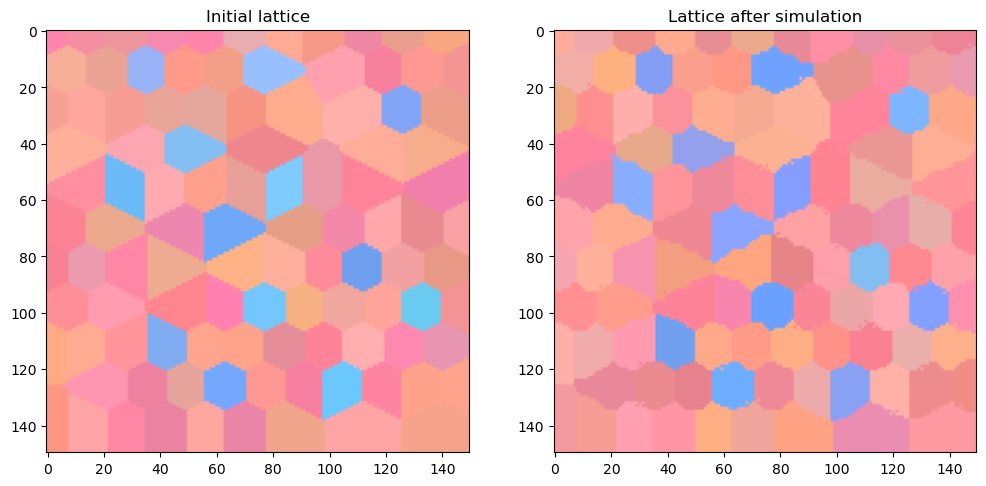

In [8]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].imshow(color_code_cells(cpm.lattice, cpm.tau))
ax[0].set_title("Initial lattice")
ax[1].imshow(color_code_cells(grid, cpm.tau))
ax[1].set_title("Lattice after simulation")

In [ ]:
plt.